In [1]:
%%capture 
! pip install ipywidgets

In [110]:
import pandas as pd
import numpy as np

from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import PolynomialFeatures

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#importing data from IBM cloud object
df = pd.read_csv("datasets/car_prices_dataset.csv")

Printing numeric data

In [4]:
numeric_data = df._get_numeric_data()
numeric_data.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


There are 21 columns with numeric data.

## Functions for plotting

First let's create some functions to plot the results.

In [5]:
def distribution_plot(red_func, blue_func, red_name, blue_name, title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(red_func, hist=False, color="r", label=red_name)
    ax2 = sns.distplot(blue_func, hist=False, color="b", label=blue_name, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [6]:
def polly_plot(x_train, x_test, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([x_train.values.max(), x_test.values.max()])

    xmin=min([x_train.values.min(), x_test.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(x_train, y_train, 'ro', label='Training Data')
    plt.plot(x_test, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

# Training the model

As we are trying to predict the car price, we take it as y variable and take other varaibles as features.

In [7]:
y_data = numeric_data['price']

In [8]:
x_data = numeric_data.drop('price',axis=1)

Splitting data sets in to test and train data. We allocate ```15%``` data to ```test``` set, and other part as the training set.

In [9]:
x_train, x_test, y_train, y_test  = train_test_split(x_data, y_data, test_size = 0.15, random_state = 1)

print("Number of samples in train set:", x_train.shape[0])
print("Number of samples in test set:", x_test.shape[0])

Number of samples in train set: 170
Number of samples in test set: 31


We will use linear regression as model and use ```horsepower``` for train the model. 

In [10]:
lre =  LinearRegression()

In [11]:
lre.fit(x_train[['horsepower']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
lre.score(x_test[['horsepower']], y_test)

0.707688374146705

In [13]:
lre.score(x_train[['horsepower']], y_train)

0.6449517437659684

Now we try to use 4 fold cross validation for model training.

In [14]:
r_cross = cross_val_score(lre,x_data[['horsepower']],y_data,cv=4)

print("cross validation scores for the 4 folds : ", r_cross)
print("mean R^2 value of the cross validation set: ", r_cross.mean(), " and standard dev: ", r_cross.std())

cross validation scores for the 4 folds :  [0.7746232  0.51716687 0.74785353 0.04839605]
mean R^2 value of the cross validation set:  0.522009915042119  and standard dev:  0.29118394447560286


In [15]:
# negative mean squre error as the scoring function
neg_mean_squre = cross_val_score(lre,numeric_data[['horsepower']],y_data,scoring='neg_mean_squared_error',cv=4)

print("cross validation neg_mean_squre scores for the 4 folds : ", neg_mean_squre)
print("neg mean squre value of the cross validation set: ", neg_mean_squre.mean(), " and standard dev: ", neg_mean_squre.std())

cross validation neg_mean_squre scores for the 4 folds :  [-20254142.84026704 -43745493.26505169 -12539630.34014931
 -17561927.7224759 ]
neg mean squre value of the cross validation set:  -23525298.541985985  and standard dev:  11997952.238146855


Cross validation fold predictions for all folds.

In [16]:
cv_predictions = cross_val_predict(lre, x_data[['horsepower']],y_data,cv=4)
print("First five predictions: ", cv_predictions[0:5])

First five predictions:  [14141.63807508 14141.63807508 20814.29423473 12745.03562306
 14762.35027598]


## Analysing overfitting and underfitting

For this we use multiple features, and multiple linear regression and polynomial regression, so we can expolre overfitting of the model.

In [72]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
# predictions on the training set
y_hat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

# predictions on the test set
y_hat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

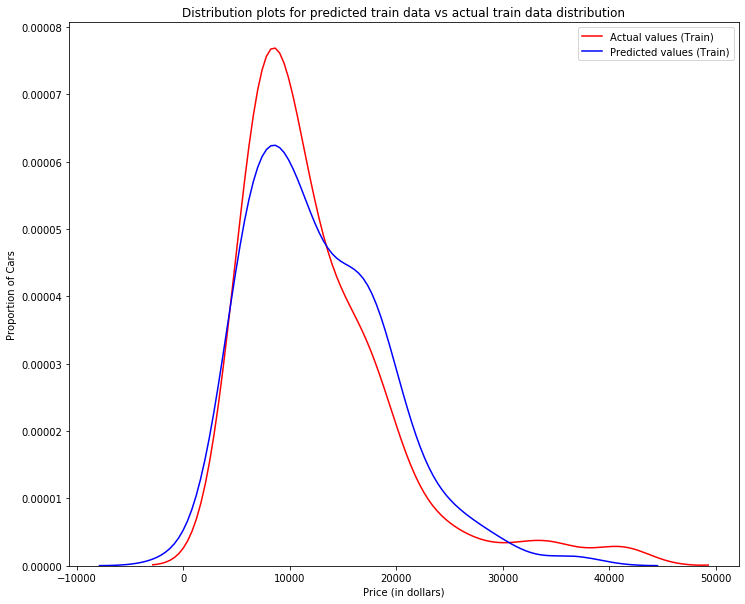

In [74]:
Title = 'Distribution plots for predicted train data vs actual train data distribution'
distribution_plot(y_train, y_hat_train, "Actual values (Train)", "Predicted values (Train)", Title)

We can see that model fits training data to the original data set.

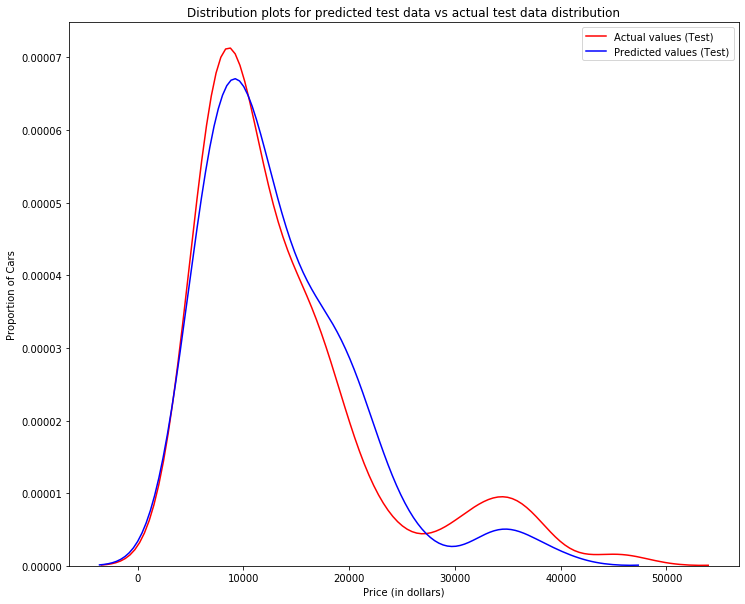

In [75]:
Title = 'Distribution plots for predicted test data vs actual test data distribution'
distribution_plot(y_test, y_hat_test, "Actual values (Test)", "Predicted values (Test)", Title)

However, for the test data model dosen't perform that well. Specially for the 5000 - 15000 range.

This is due to overfitting. Overfitting become evident when there are a lot of features. Overfitting occurs when model fits the noise but not the underelying proccess. Therefore, when we use the test set, the performance is reduced as the model fits noise not the underlying fucntion. 

Now lets check how overfitting occurs in polynomial regression. We use 55% data for training set and 45% to test data.

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.45, random_state=0)

We use 5th order polynomial fit for the  model.

In [77]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])

In [78]:
# fitting model to train data
poly = LinearRegression()
poly.fit(x_train_pr,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
yhat = poly.predict(x_test_pr)

print("Predicted values: ", yhat[0:5])
print("Actual values: ", y_test[0:5].values)

Predicted values:  [ 6728.63726455  7307.97012815 12213.77740073 18893.28579913
 19995.99229568]
Actual values:  [ 6295. 10698. 13860. 13499. 15750.]


Now lets compare predicted values to actual values using the polypolt function we declared earlier.

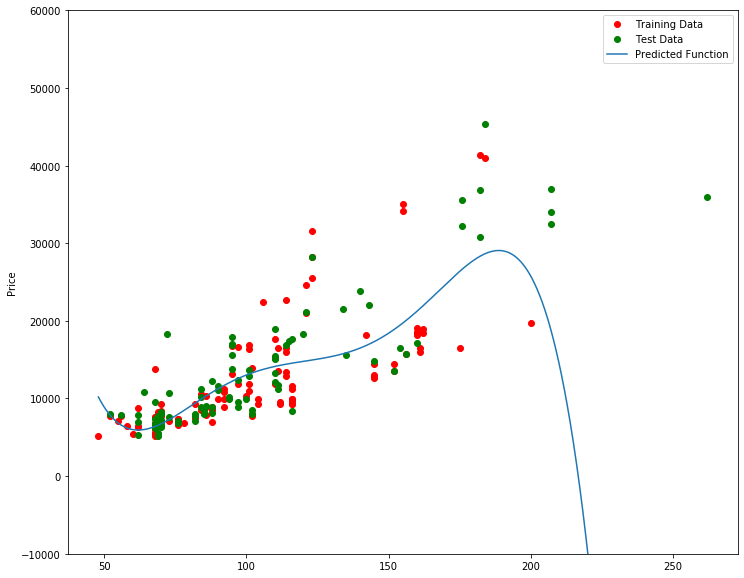

In [80]:
polly_plot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

In [81]:
poly.score(x_train_pr,y_train)

0.5567716901617162

In [82]:
poly.score(x_test_pr,y_test)

-29.87130140754796

We can see that R^2 value for training data is a moderate fit. However, for the testing data R^2 value is -29 showing siogns of a overfitted model.

Let's draw R^2 for several polynomial orders.

Text(3, 0.75, 'Maximum R^2')

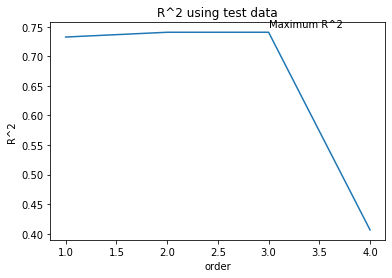

In [83]:
r_squre_values = []

order = range(1,5)

for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    
    lr.fit(x_train_pr,y_train)
    
    r_squre_values.append(lr.score(x_test_pr,y_test))
    
plt.plot(order,r_squre_values)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 using test data')
plt.text(3,0.75,'Maximum R^2')

Now lets check how model fit varies with different testset sizes and polynomial orders.

In [84]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    polly_plot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

In [85]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

Lets create a polynomial fit with more than one variables

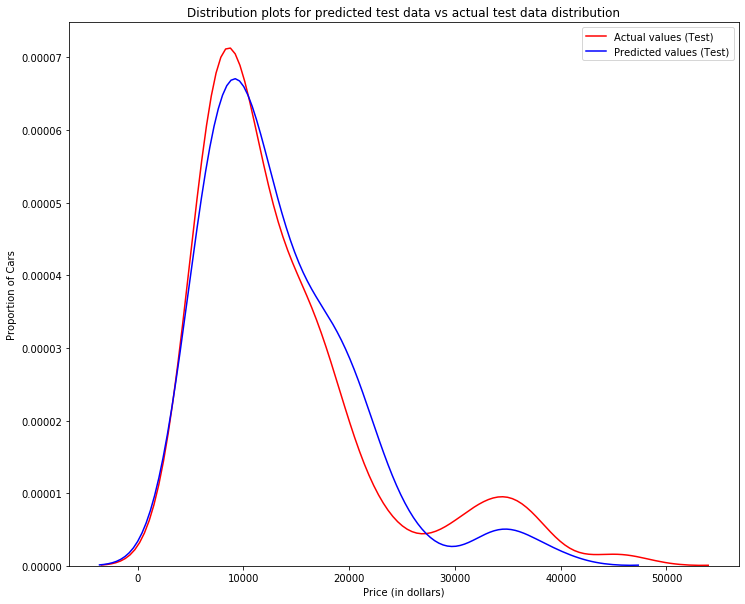

In [91]:
pr1 = PolynomialFeatures(degree=2)
x_train_pr1 =  pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size','highway-mpg']])
x_test_pr1 =  pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size','highway-mpg']])

lr.fit(x_train_pr1,y_train)

y_predictions = lr.predict(x_test_pr1)

Title = 'Distribution plots for predicted test data vs actual test data distribution'
distribution_plot(y_test, y_hat_test, "Actual values (Test)", "Predicted values (Test)", Title)

We can see that the predicted prices are lower than the actual values for 10000 range. Conversly, for prices 30000 above model predictions are higer than the actual values.

## Ridge regression

Let's use ridge regression to reduce the overfitting of the model.

In [100]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [101]:
# define the model object
rm =Ridge(alpha=0.1, normalize=True)

rm.fit(x_train_pr,y_train)

yhat = rm.predict(x_test_pr)

print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 5426.03831354  9886.10493613 20291.24448495 21475.40719196]
test set : [ 6295. 10698. 13860. 13499.]


Lets study of alpha values changes the R^2 values of the model fit.

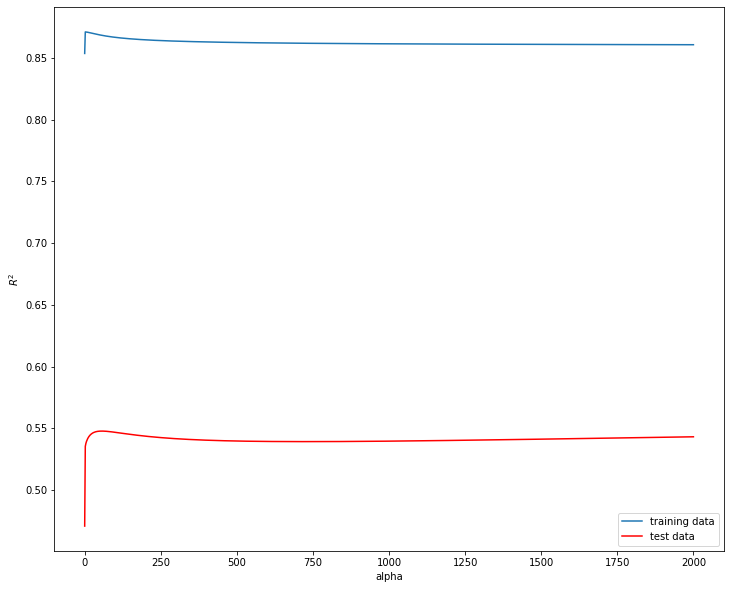

In [107]:
rsqu_test = []
rsqu_train = []
# pr=PolynomialFeatures(degree=2)
# x_train_pr =  pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size','highway-mpg']])
# x_test_pr =  pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size','highway-mpg']])
alpha_values = np.linspace(0,2000,1000)
for alphax in alpha_values:
    rigeModel = Ridge(alpha=alphax) 
    rigeModel.fit(x_train_pr, y_train)
    rsqu_test.append(rigeModel.score(x_test_pr, y_test))
    rsqu_train.append(rigeModel.score(x_train_pr, y_train))
    
# lets plot the result
plt.figure(figsize=(12,10))
plt.plot(alpha_values,rsqu_train,label="training data")
plt.plot(alpha_values,rsqu_test,'r', label="test data")
plt.xlabel('alpha')
plt.ylabel('$R^2$')
plt.legend()

As shown in the figure, as alpha value increases, the train data perform worse in the model. However, when alpha increases the model performance increases in the test data.

## Grid search

Let's study how we can use grid search to obtain optimal values for our model. 

In [129]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000], 'normalize':[True,False]}]

In [139]:
grid1 = GridSearchCV(Ridge(), parameters1,cv=4, iid=True)

In [140]:
grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid=True, n_jobs=None,
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000],
                          'normalize': [True, False]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [143]:
best_ridge_model = grid1.best_estimator_
best_ridge_model

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

$R^2$ value for the best model found from grid search is shown below.

In [145]:
best_ridge_model.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_test)

0.8408597192943013